# Imports and Constants

In [1]:
import json
import os
import sys

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

PIDs = [
    "ngFQZ3PEO5NJ",
    "JT7ru39Irzx7",
    "a6RSZr6Rflrh",
    "SyndXrJWn1Ei",
    "HuW1wIIebZWn",
    "NvepUR3xQYb3",
    "w7TNykrDwr1q",
    "tqJLycRmlf6B",
    "CoYhbad22Jko",
    "w7TXwcLz7Ydb",
    "ruM5fRj1p3f9",
    "wQez7lrGYiza",
    "xnfPy13ddVDB",
    "2Ispy3RTXFLN",
    "MQNQXUlXMlJG",
    "yvoRfW5318GY"
]

# Post-Study Survey of Analysis Quality Metrics Between Interfaces

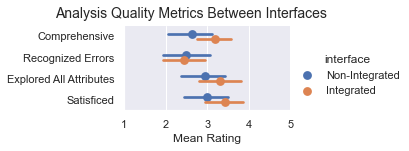

,shorthand,interface,mean,lower_bound,uppper_bound
0,Comprehensive,Integrated,3.1875,2.7500,3.5625
1,Comprehensive,Non-Integrated,2.6250,2.0625,3.1250
2,Explored All Attributes,Integrated,3.3125,1.9375,2.9375
3,Explored All Attributes,Non-Integrated,2.9375,1.9375,3.0625
4,Recognized Errors,Integrated,2.4375,2.8125,3.8125
5,Recognized Errors,Non-Integrated,2.5000,2.3750,3.4375
6,Satisficed,Integrated,3.4375,2.9375,3.8750
7,Satisficed,Non-Integrated,3.0000,2.4375,3.5000


In [2]:

# Get Data
df = pd.read_csv(os.path.join("data", "surveys", "post-study_survey-values.csv"), header=0).iloc[0:8]
df1 = pd.melt(
    df, 
    id_vars=['shorthand', 'interface'], 
    value_vars=PIDs,
    var_name='pid', 
    value_name='score',
)

# Create plot
g = sns.catplot(
    x="score", 
    y="shorthand",
    hue="interface", 
    data=df1,
    orient="h", 
    kind="point", 
    ci=95, 
    n_boot=1000,
    dodge=0.25,
    join=False,
    height=2,
    aspect=2.5
)

# Edit plot
g.set(xlabel="Mean Rating", ylabel=None)
fig = g.fig
fig.suptitle(
    'Analysis Quality Metrics Between Interfaces', 
    fontsize=14,
    x=0.54,
    y=1.04,
)
plt.xlim(1, 5)

# Save plot
plt.show()
# fig.savefig("figures/surveys/analysis_quality_metrics.png", bbox_inches='tight')

# Get plotted values
mean_df = df1.groupby(["shorthand", "interface"])["score"].mean().rename("mean")
cis = [l.get_xdata() for l in g.ax.lines]
ci_lbs_df = pd.Series(
    [cis[4][0], cis[0][0], 
     cis[5][0], cis[1][0], 
     cis[6][0], cis[2][0], 
     cis[7][0], cis[3][0]],
    name="lower_bound",
    index=mean_df.index
)
ci_ubs_df = pd.Series(
    [cis[4][1], cis[0][1], 
     cis[5][1], cis[1][1], 
     cis[6][1], cis[2][1], 
     cis[7][1], cis[3][1]],
    name="uppper_bound",
    index=mean_df.index
)
tasktimes_df = pd.concat([
    mean_df,
    ci_lbs_df,
    ci_ubs_df
], axis=1).reset_index()

tasktimes_df

# Post-Study Survey of Usefulness of Integrated Interface Panels for Integrating Data

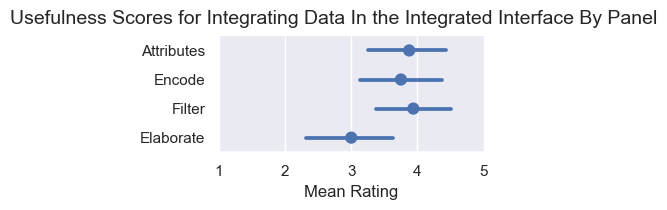

,shorthand,interface,mean,lower_bound,uppper_bound
0,Attributes,Integrated,3.8750,3.2500,4.4375
1,Elaborate,Integrated,3.0000,2.3125,3.6250
2,Encode,Integrated,3.7500,3.1250,4.3750
3,Filter,Integrated,3.9375,3.3750,4.5000


In [3]:

# Get Data
df = pd.read_csv(os.path.join("data", "surveys", "post-study_survey-values.csv"), header=0).iloc[8:12]
df1 = pd.melt(
    df, 
    id_vars=['shorthand', 'interface'], 
    value_vars=PIDs,
    var_name='pid', 
    value_name='score',
)

# Create plot
g = sns.catplot(
    x="score", 
    y="shorthand",
    data=df1,
    orient="h", 
    kind="point", 
    ci=95, 
    n_boot=1000,
    dodge=0.25,
    join=False,
    height=2,
    aspect=2
)

# Edit plot
g.set(xlabel="Mean Rating", ylabel=None)
fig = g.fig
fig.suptitle(
    'Usefulness Scores for Integrating Data In the Integrated Interface By Panel', 
    fontsize=14,
    x=0.58,
    y=1.04,
)
plt.xlim(1, 5)

# Save plot
plt.show()
# fig.savefig("figures/surveys/usefulness_integrated_panels.png", bbox_inches='tight')

# Get plotted values
mean_df = df1.groupby(["shorthand", "interface"])["score"].mean().rename("mean")
cis = [l.get_xdata() for l in g.ax.lines]
ci_lbs_df = pd.Series(
    [cis[0][0], 
     cis[3][0], 
     cis[1][0], 
     cis[2][0]],
    name="lower_bound",
    index=mean_df.index
)
ci_ubs_df = pd.Series(
    [cis[0][1], 
     cis[3][1], 
     cis[1][1], 
     cis[2][1]],
    name="uppper_bound",
    index=mean_df.index
)
tasktimes_df = pd.concat([
    mean_df,
    ci_lbs_df,
    ci_ubs_df
], axis=1).reset_index()

tasktimes_df

# Post-Study Survey of Analysis Aspects Between Interfaces

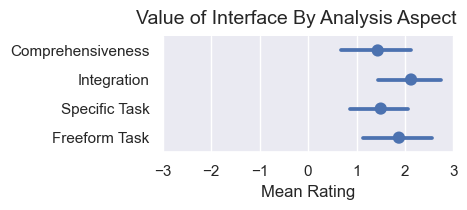

,shorthand,interface,mean,lower_bound,uppper_bound
0,Comprehensiveness,Both,1.4375,0.6875,2.1250
1,Freeform Task,Both,1.8750,1.1250,2.5625
2,Integration,Both,2.1250,1.4375,2.7500
3,Specific Task,Both,1.5000,0.8750,2.0625


In [4]:

# Get Data
df = pd.read_csv(os.path.join("data", "surveys", "post-study_survey-values.csv"), header=0).iloc[12:16]
df1 = pd.melt(
    df, 
    id_vars=['shorthand', 'interface'], 
    value_vars=PIDs,
    var_name='pid', 
    value_name='score',
)

# Create plot
g = sns.catplot(
    x="score", 
    y="shorthand",
    data=df1,
    orient="h", 
    kind="point", 
    ci=95, 
    n_boot=1000,
    dodge=0.25,
    join=False,
    height=2,
    aspect=2.5
)

# Edit plot
g.set(xlabel="Mean Rating", ylabel=None)
fig = g.fig
fig.suptitle(
    'Value of Interface By Analysis Aspect', 
    fontsize=14,
    x=0.65,
    y=1.04,
)
plt.xlim(-3, 3)

# Save plot
plt.show()
# fig.savefig("figures/surveys/interface_compare_value.png", bbox_inches='tight')

# Get plotted values
mean_df = df1.groupby(["shorthand", "interface"])["score"].mean().rename("mean")
cis = [l.get_xdata() for l in g.ax.lines]
ci_lbs_df = pd.Series(
    [cis[0][0], 
     cis[3][0], 
     cis[1][0], 
     cis[2][0]],
    name="lower_bound",
    index=mean_df.index
)
ci_ubs_df = pd.Series(
    [cis[0][1], 
     cis[3][1], 
     cis[1][1], 
     cis[2][1]],
    name="uppper_bound",
    index=mean_df.index
)
tasktimes_df = pd.concat([
    mean_df,
    ci_lbs_df,
    ci_ubs_df
], axis=1).reset_index()

tasktimes_df